In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

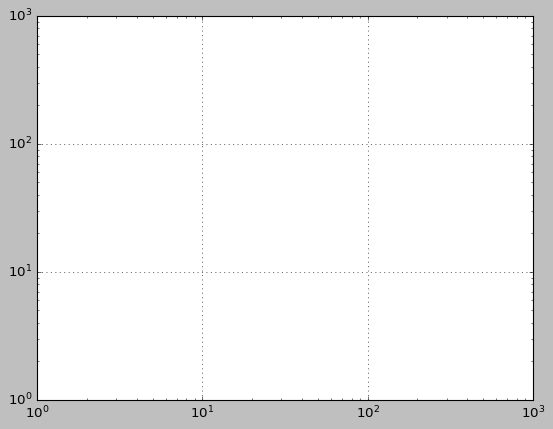

In [2]:
# 以對數表示範次要刻度
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);

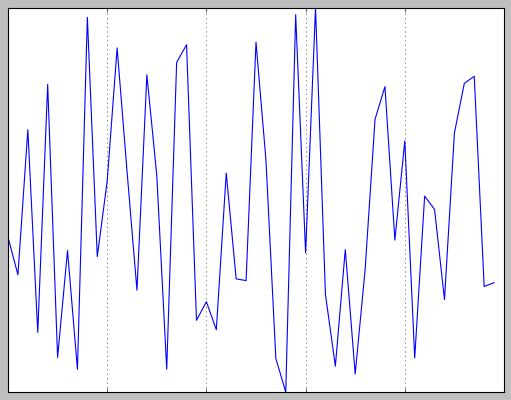

In [3]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()
# 隱藏y軸的刻度與標籤
ax.yaxis.set_major_locator(plt.NullLocator())
# 隱藏x軸的標籤
ax.xaxis.set_major_formatter(plt.NullFormatter())

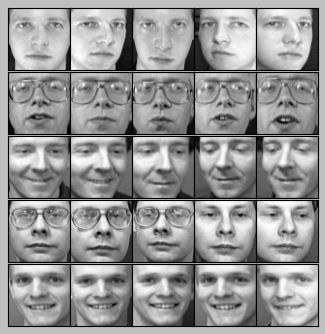

In [ ]:
# 以影像辨識為例
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 載入圖片
faces = np.load("data/olivetti_faces.npy")

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')

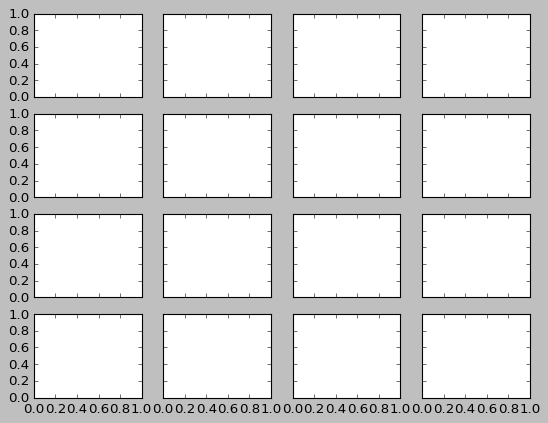

In [10]:
# 預設值 刻度會擠在一起
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

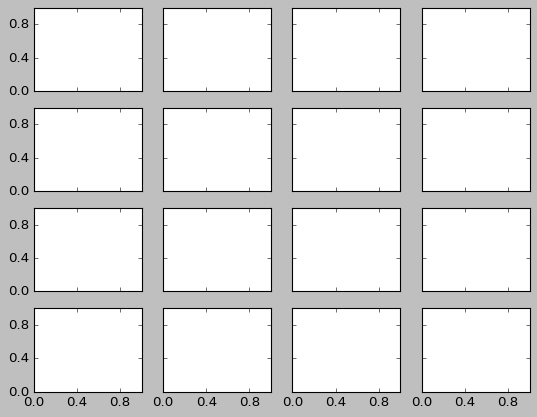

In [ ]:
# 使用 MaxNLocater() 修正問題 指定顯示的刻度數目
#.flat 壓平陣列為一維
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

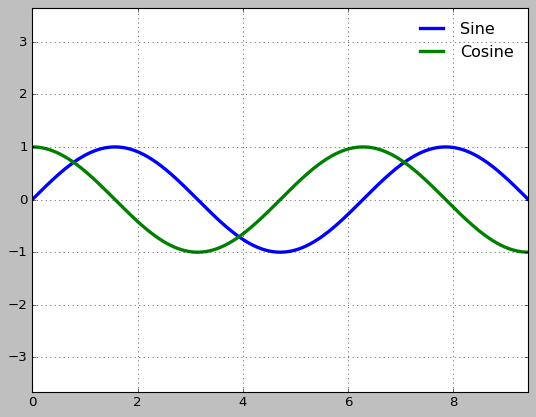

In [13]:
# 先以預設值建立 sin cos 圖表
fig, ax =plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 設定格線 圖例 與顯示範圍
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

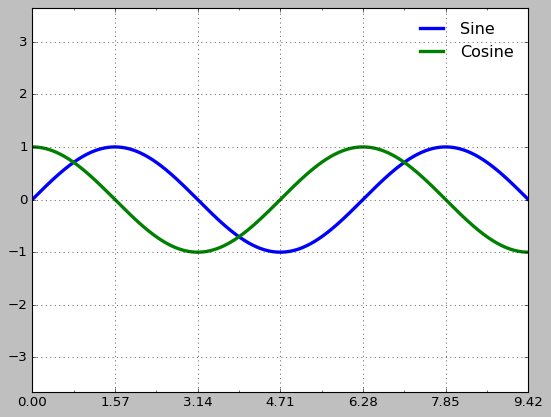

In [14]:
# 調整主要刻度為pi/2 次要刻度為pi/4
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

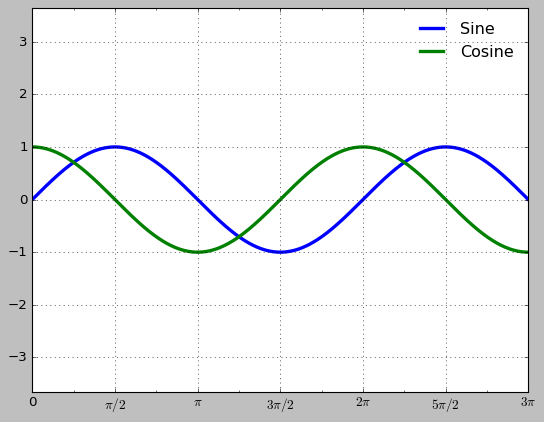

In [ ]:
# 數字不夠直觀 改為數學記號的pi
def format_func(value, tick_number):
    # 找出多個 pi/2 的數目
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"

# FuncFormatter() 接受自訂函式
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig